In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
!mkdir -p ~/.streamlit/
!echo "[server]"  > ~/.streamlit/config.toml
!echo "headless = true"  >> ~/.streamlit/config.toml
!echo "port = $PORT"  >> ~/.streamlit/config.toml
!echo "enableCORS = false"  >> ~/.streamlit/config.toml

In [4]:
import pandas as pd

data = pd.read_csv("Skopje.csv")

data.head(10) #prvite 10 reda

,time,temp,humidity,windspeed,cloudcover,conditions,PM10,PM2.5,O3,NO2,CO,SO2
0,01-01-22 15:00,14.0,62.26,1.3,31.1,Partially cloudy,80.049,76.059,5.8,67.805,0.9025,5.3998
1,01-01-22 16:00,13.7,62.49,4.6,58.0,Partially cloudy,116.690,99.290,12.0,43.930,0.2656,6.4372
2,01-01-22 17:00,13.0,62.58,4.5,52.1,Partially cloudy,46.537,23.964,7.2,64.940,0.4222,7.9800
3,01-01-22 18:00,12.8,58.91,3.8,29.0,Partially cloudy,55.914,32.643,6.0,70.097,0.4431,3.6442
4,01-01-22 19:00,13.0,56.50,3.7,52.4,Partially cloudy,48.060,26.204,6.8,61.311,0.3318,5.0274
5,01-01-22 20:00,10.9,71.26,9.4,89.1,Partially cloudy,42.050,27.941,8.6,52.907,0.1624,3.1388
6,01-01-22 21:00,11.0,71.27,7.4,89.1,Partially cloudy,28.109,21.206,16.6,35.908,0.0139,2.1546
7,01-01-22 22:00,12.7,58.23,10.6,7.4,Clear,15.156,15.193,12.4,36.290,0.0394,2.6334
8,01-01-22 23:00,8.9,81.47,0.3,89.1,Partially cloudy,21.941,14.030,13.2,45.840,0.1589,2.8728
9,02-01-22 0:00,9.9,76.46,5.1,89.1,Partially cloudy,29.935,16.891,8.8,60.356,0.4466,3.1654


In [5]:
data.isnull().sum()


time          0
temp          0
humidity      0
windspeed     0
cloudcover    0
conditions    0
PM10          0
PM2.5         0
O3            0
NO2           0
CO            0
SO2           0
dtype: int64

<ipython-input-6-bfaf45a8eb9b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['PM10'], ax = ax)  # kreiranje raspredelba


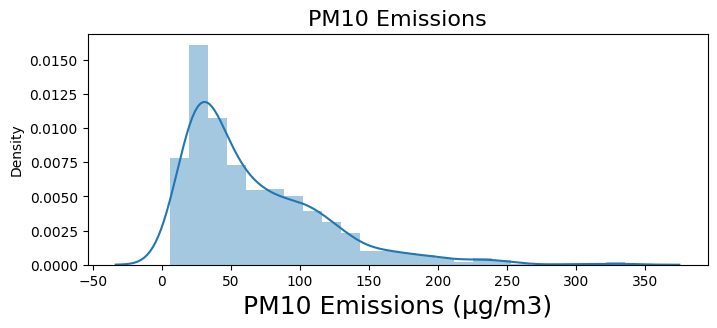

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 3))  #grafikot
sns.distplot(data['PM10'], ax = ax)  # kreiranje raspredelba
ax.set_xlabel('PM10 Emissions (µg/m3)', fontsize = 18)  #naslov
ax.set_title('PM10 Emissions', fontsize = 16)
ax.tick_params(labelsize=10) # golemina na bukvite

<ipython-input-7-560efe5359df>:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0,220)


Text(0.5, 0, ' ')

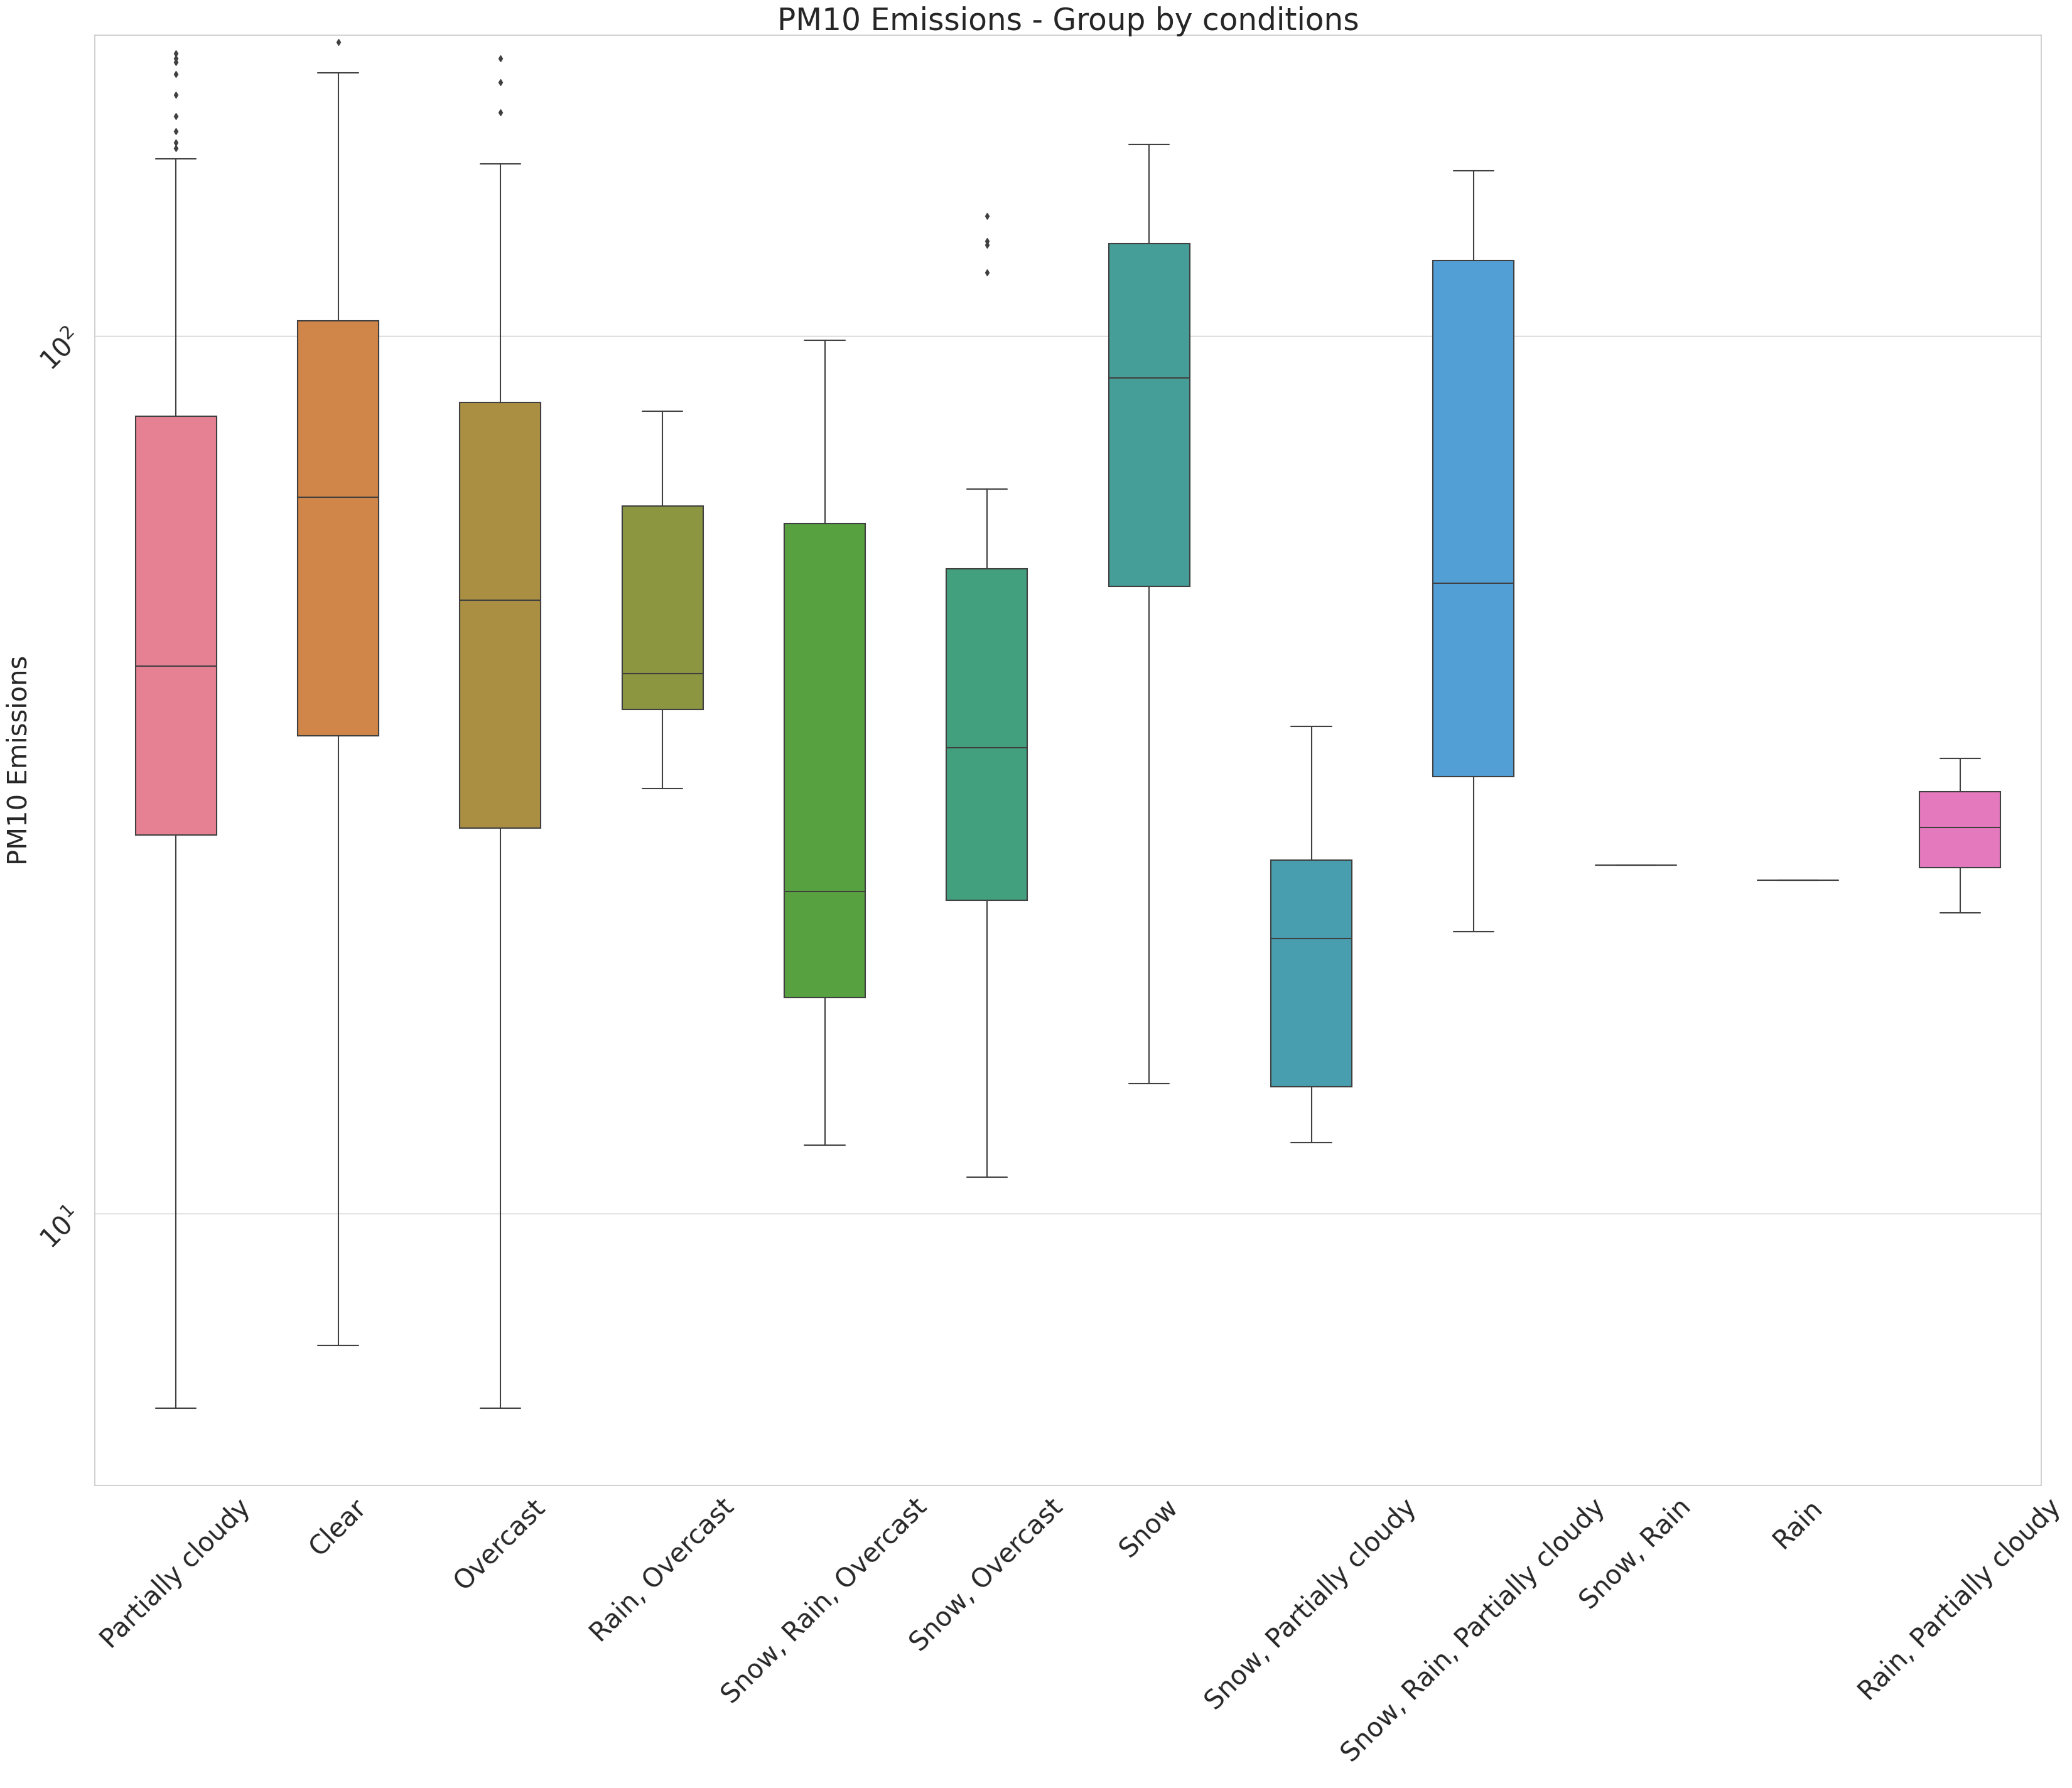

In [ ]:
#stil i  paleta na sns
sns.set(style = 'whitegrid')
sns.set_palette('bright')

fig, ax = plt.subplots(figsize=(40, 30)) #grafikot

#kreiranje bloxplot so seaborn
sns.boxplot(x="conditions", hue="conditions", y="PM10", palette="husl" ,data=data, width = 0.5, dodge = False)

ax.set_title('PM10 Emissions - Group by conditions', fontsize = 35)
ax.tick_params(labelsize=30, rotation = 45)
ax.legend_.remove()
ax.set_yscale('log')
ax.set_ylim(0,220)
ax.set_ylabel('PM10 Emissions', fontsize = 30)
ax.set_xlabel(' ')

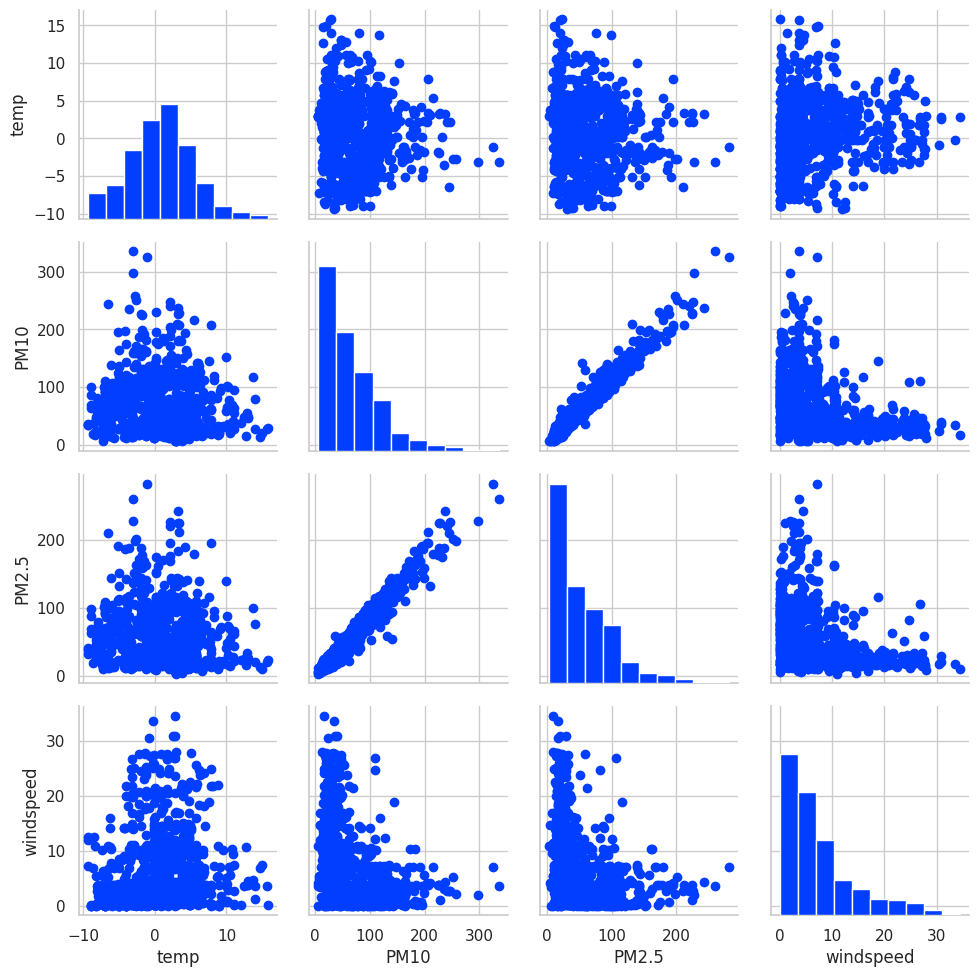

In [ ]:
#matrica na grafici
g = sns.PairGrid(data, vars=["temp", "PM10", "PM2.5", "windspeed"], dropna=True)
g.map_diag(plt.hist)  # hist funkcija za diagonalni grafici
g.map_offdiag(plt.scatter);  # scatter funkcija za grafici nadvor od diagonalata

<ipython-input-9-f3e7eb8633bd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()  # korelaciona matrica


<Axes: >

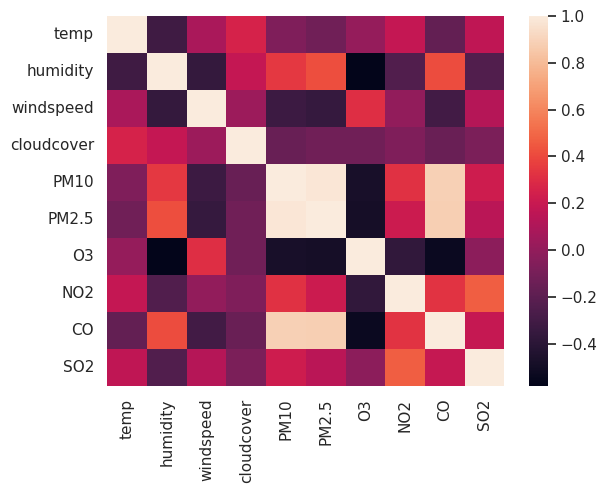

In [ ]:
corr = data.corr()  # korelaciona matrica
# toplotna mapa so seaborn
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
data['time'] =  pd.to_datetime(data['time'], format='%d-%m-%y %H:%M')

data.head(10)

,time,temp,humidity,windspeed,cloudcover,conditions,PM10,PM2.5,O3,NO2,CO,SO2
0,2022-01-01 15:00:00,14.0,62.26,1.3,31.1,Partially cloudy,80.049,76.059,5.8,67.805,0.9025,5.3998
1,2022-01-01 16:00:00,13.7,62.49,4.6,58.0,Partially cloudy,116.690,99.290,12.0,43.930,0.2656,6.4372
2,2022-01-01 17:00:00,13.0,62.58,4.5,52.1,Partially cloudy,46.537,23.964,7.2,64.940,0.4222,7.9800
3,2022-01-01 18:00:00,12.8,58.91,3.8,29.0,Partially cloudy,55.914,32.643,6.0,70.097,0.4431,3.6442
4,2022-01-01 19:00:00,13.0,56.50,3.7,52.4,Partially cloudy,48.060,26.204,6.8,61.311,0.3318,5.0274
5,2022-01-01 20:00:00,10.9,71.26,9.4,89.1,Partially cloudy,42.050,27.941,8.6,52.907,0.1624,3.1388
6,2022-01-01 21:00:00,11.0,71.27,7.4,89.1,Partially cloudy,28.109,21.206,16.6,35.908,0.0139,2.1546
7,2022-01-01 22:00:00,12.7,58.23,10.6,7.4,Clear,15.156,15.193,12.4,36.290,0.0394,2.6334
8,2022-01-01 23:00:00,8.9,81.47,0.3,89.1,Partially cloudy,21.941,14.030,13.2,45.840,0.1589,2.8728
9,2022-01-02 00:00:00,9.9,76.46,5.1,89.1,Partially cloudy,29.935,16.891,8.8,60.356,0.4466,3.1654


In [ ]:
data.set_index('time')
data['time'] = pd.to_numeric(pd.to_datetime(data['time']))

In [ ]:
from sklearn.model_selection import train_test_split
# Delenje na podatocite na karakteristiki x i y
y = data['PM10']
X = data.drop(['conditions','PM10'], axis=1)

# Delenje na podatocite na obuka i testiranje
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LinearRegression() # Kreiranje na instanca od LinearRegression

lr.fit(X_train, y_train)  # Obuka na modelot so trening podatocite

lin_pred = lr.predict(X_test)  # Predviduvanje na vrednostite
linear_regression_score = lr.score(X_test, y_test)  # Presmetka na R-kvadratot
print("Linear regression score for PM10: ", linear_regression_score) #pecatenje
print("Mean absolute error for PM10: %.2f"
      % mean_absolute_error(y_test, lin_pred))

Linear regression score for PM10:  0.9610732129767661
Mean absolute error for PM10: 6.39


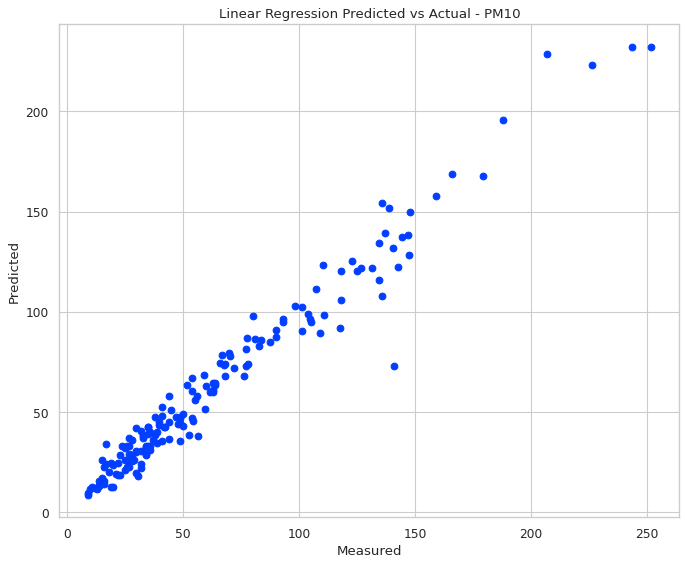

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)
plt.scatter(y_test, lin_pred) # Crtanje na scatter grafikon kade x-oskata e vistinskata vrednost
plt.xlabel('Measured') # Dodeluvanje na oznaka na x-oskata
plt.ylabel('Predicted') # Dodeluvanje na oznaka na y-oskata
plt.title('Linear Regression Predicted vs Actual - PM10')  # Dodeluvanje na naslov na grafikonot
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


regr_rf = RandomForestRegressor(n_estimators=200, random_state=1234)  # Kreiranje na instanca od RandomForestRegressor modelot

regr_rf.fit(X_train, y_train)  # Obuka na modelot

decision_forest_score = regr_rf.score(X_test, y_test) # Presmetka na rezultatot (skorot) na Decision Forest modelot
print("Decision forest score for PM10: ", decision_forest_score)

regr_rf_pred = regr_rf.predict(X_test) # Predviduvanje na vrednostite
print("Mean absolute error for PM10: %.2f"
      % mean_absolute_error(y_test, regr_rf_pred)) # Presmetka i pecatenje na srednata apsolutna greska za Decision Forest

Decision forest score for PM10:  0.9635424837236339
Mean absolute error for PM10: 6.26


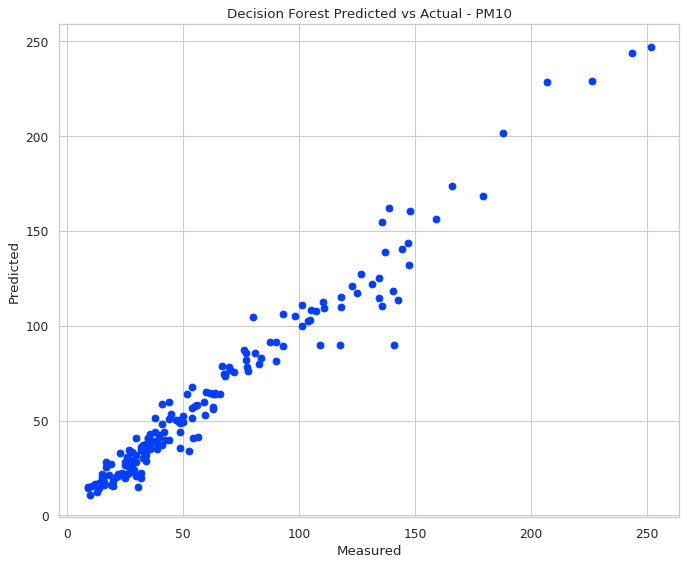

In [ ]:
figure(figsize=(10, 8), dpi=80)
plt.scatter(y_test, regr_rf_pred) # Crtanje na scatter grafikon
plt.xlabel('Measured')  # Dodeluvanje na oznaka na x-oskata
plt.ylabel('Predicted')  # Dodeluvanje na oznaka na y-oskata
plt.title('Decision Forest Predicted vs Actual - PM10') # Dodeluvanje na naslov na grafikonot
plt.show()

In [ ]:
# Izdvojuvanje na karakteristikite vo novi promenlivi y2 i X2
y2 = data['NO2']
X2 = data.drop(['conditions','NO2'], axis=1)

# Podelba na podatocite na trening i test mnozestva
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=1234)

lr = LinearRegression() # Kreiranje na instanca od LinearRegression

lr.fit(X_train, y_train) # Obuka na modelot

lin_pred = lr.predict(X_test) # Predviduvanje na vrednostite
linear_regression_score = lr.score(X_test, y_test)  # Presmetka na R-kvadratot
print("Linear regression score for NO2: ", linear_regression_score) # Pecatenje na R-kvadratot
print("Mean absolute error for NO2: %.2f"
      % mean_absolute_error(y_test, lin_pred)) # Presmetka i pecatenje na srednata apsolutna greska

Linear regression score for NO2:  0.5997884351215823
Mean absolute error for NO2: 9.83


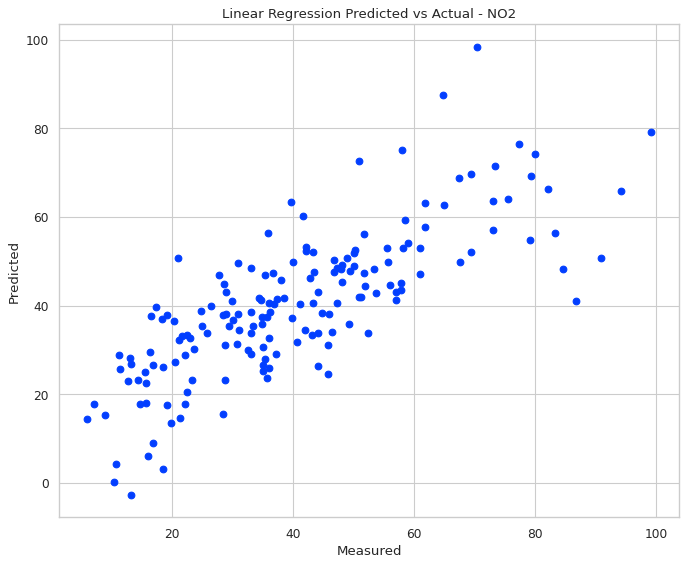

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80) # Kreiranje na grafik
plt.scatter(y_test, lin_pred) # Crtanje na scatter grafikon
plt.xlabel('Measured') # Dodeluvanje na oznaka na x-oskata
plt.ylabel('Predicted') # Dodeluvanje na oznaka na y-oskata
plt.title('Linear Regression Predicted vs Actual - NO2') # Dodeluvanje na naslov na grafikonot
plt.show()


In [ ]:
# Kreiranje na instanca od RandomForestRegressor
regr_rf = RandomForestRegressor(n_estimators=200, random_state=1234)

regr_rf.fit(X_train, y_train) # Obuka na modelot so trening podatocite

decision_forest_score = regr_rf.score(X_test, y_test)  # Presmetka na rezultatot (skorot) na Decision Forest modelot
print("Decision forest score for NO2: ", decision_forest_score) # Pecatenje na rezultatot

regr_rf_pred = regr_rf.predict(X_test) # Predviduvanje na vrednostite
print("Mean absolute error for NO2: %.2f"
      % mean_absolute_error(y_test, regr_rf_pred)) # Presmetka i pecatenje

Decision forest score for NO2:  0.735275263798987
Mean absolute error for NO2: 7.55


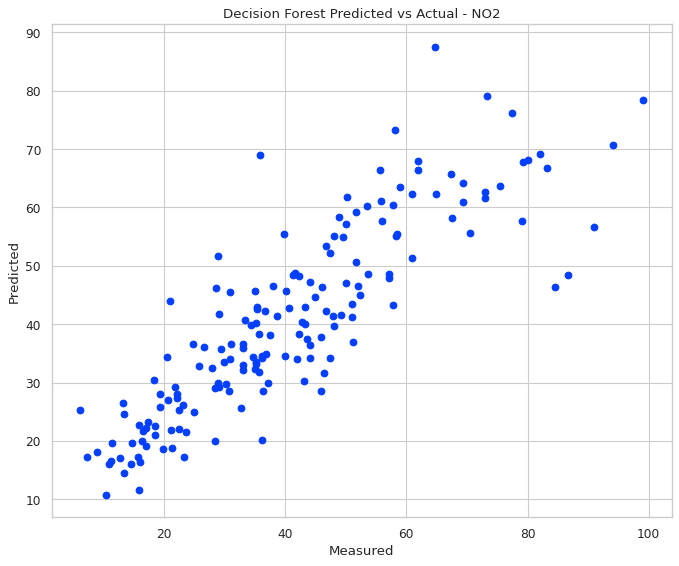

In [ ]:
figure(figsize=(10, 8), dpi=80) #crtanje grafik
plt.scatter(y_test, regr_rf_pred) # Crtanje na scatter grafikon
plt.xlabel('Measured') # Oznaka za x
plt.ylabel('Predicted') # Oznaka za y
plt.title('Decision Forest Predicted vs Actual - NO2') #naslov
plt.show()